## Deep learning tutorial follow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
%matplotlib inline
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -=mean
test_data /= std

Building the network

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

K-fold ross validation

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
all_scores = []
for i in range(k):
    print('Processing fold #',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]    
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                        train_data[(i+1)*num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                        train_targets[(i+1)*num_val_samples:]],
                                        axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data = (val_data, val_targets),
                         epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    #val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
    #all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [16]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

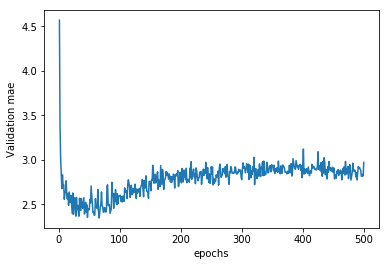

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation mae')
plt.show()